In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Q1: Simple numerical integral

Numerical integration methods work differently depending on whether you have the analytic function available (in which case you can evaluate it freely at any point you please) or if it is sampled for you.

Consider the function $f(x) = e^{-x^2}$.  We want to integrate this from $[-5, 5]$.  The
analytic integral is not easily obtained.  Use `integrate.quad` to do the integration.

In [51]:
from scipy.integrate import quad, simpson
from scipy.stats import uniform

In [93]:
min, max = -5, 5
f = lambda x : np.exp(-x**2)

integral_quad = quad(f, min, max, epsabs=1e-10, epsrel=1e-10)
print(f'Integrated value = {integral_quad[0]:.5f}, error = {integral_quad[1]:.2e}')
print(f'F-sqrt(pi) = {np.abs(integral_quad[0] - np.sqrt(np.pi)):.2e}')

Integrated value = 1.77245, error = 4.63e-14
F-sqrt(pi) = 2.72e-12


Consider now that you have data that represents a function sampled a `N` points, but you don't know the analytic form of the function.  Here, we create the sampling from a uniform distribution

Compute the integral of this sampled function using Simpson's method (`integrate.simps`).  Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes.  Simpson's method is 4-th order accurate, which means that the error should decrease by $2^4$ when we double the number of sample points

In [109]:
N = np.linspace(10, 10000, 100, dtype=int)
integral_simps = []
for n in N:
    x = np.linspace(min, max, n)
    y = f(x)
    integral_simps += [simpson(y, x)]

In [110]:
integral_MC = []
for n in N:
    x = uniform.rvs(loc=min, scale=max-min, size=n)
    integral_MC += [(max-min)*np.mean(f(x))]

[]

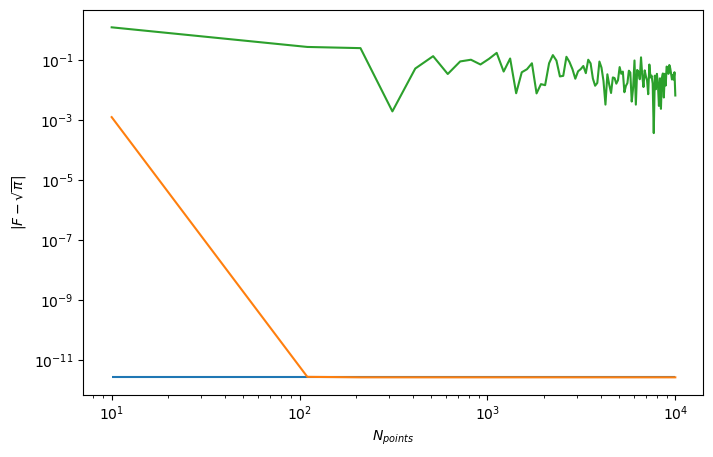

In [112]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

ax.hlines(np.abs(integral_quad[0] - np.sqrt(np.pi)), N[0], N[-1], color='C0', label='quad')
ax.plot(N, np.abs(integral_simps - np.sqrt(np.pi)), color='C1', label='simps')
ax.plot(N, np.abs(integral_MC - np.sqrt(np.pi)), color='C2', label='MC')
ax.set_xlabel(r'$N_{points}$')
ax.set_ylabel(r'$|F - \sqrt{\pi}|$')
ax.semilogx()
ax.semilogy()

## Q5: Planetary orbits

We want to consider planetary orbits.  To do this, we need to solve Newton's second law together with Newton's law of gravity.  If we restrict ourselves to the x-y plane, then there are 4 quantities we need to solve for: $x$, $y$, $v_x$, and $v_y$.  These evolve according to:

\begin{align*}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y \\
\frac{dv_x}{dt} &= a_x = -\frac{GM_\star x}{r^3} \\
\frac{dv_y}{dt} &= a_y = -\frac{GM_\star y}{r^3}
\end{align*}

To integrate these forward in time, we need an initial condition for each quantity.  We'll setup our system such that the Sun is at the origin (that will be one focus), and the planet begins at perihelion and orbits counterclockwise. 

![orbit_setup.png](attachment:orbit_setup.png)

The distance of perihelion from the focus is:

$$r_p = a (1 - e)$$

where $a$ is the semi-major axis and $e$ is the eccentricity.  The perihelion velocity is all in the $y$ direction and is:

$$v_y = v_p = \sqrt{\frac{GM_\star}{a} \frac{1+e}{1-e}}$$

We'll work in units of AU, years, and solar masses, in which case, $GM_\star = 4\pi^2$ (for the Sun).  

Your initial conditions should be:

  * $x(t=0) = r_p$
  * $y(t=0) = 0$
  * $v_x(t=0) = 0$
  * $v_y(t=0) = v_p$

In [125]:
from scipy.integrate import odeint

def eqs(t, X):
    r = np.sqrt(X[0]**2+X[1]**2)
    
    dxdt = X[2]
    dydt = X[3]
    dvxdt = -4*np.pi**2*X[0]/r**3
    dvydt = -4*np.pi**2*X[1]/r**3

    return [dxdt, dydt, dvxdt, dvydt]

def X0(a, e):
    return [a*(1-e), 0, 0, np.sqrt(4*np.pi**2/a*(1+e)/(1-e))]

In [145]:
tf = 1
t = np.linspace(0, tf, 1000)
a = 1
e = 0.5

orbit = odeint(eqs, X0(a, e), t, tfirst=True)

(-2.0, 2.0)

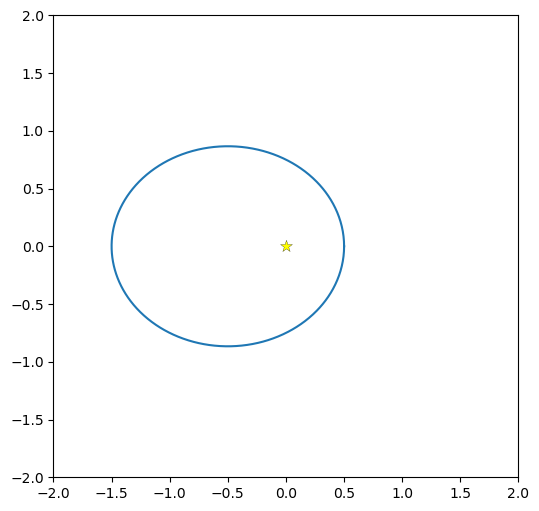

In [151]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.plot(orbit[:,0], orbit[:,1])
ax.scatter(0,0, marker='*', color='yellow', edgecolor='k', linewidths=0.2, s=80)
ax.set_xlim(-2*a, 2*a)
ax.set_ylim(-2*a, 2*a)